# 기초 인공지능

In [1]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import umap

### [Step1] 데이터 로드

In [2]:
digits = load_digits() #숫자 데이터셋인 Mnist dataset을 불러옵니다. 
x = digits.data # x에 이를 할당합니다. 

In [3]:
x.shape

(1797, 64)

### [Step2] 데이터 시각화하기

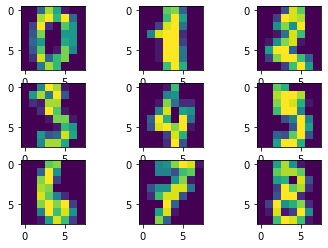

In [16]:
fig = plt.figure()
for i in range(9):
    fig.add_subplot(3,3,i+1)
    plt.imshow(digits.images[i])
plt.show()

### [Step3] 모델 구성 및 학습하기

In [3]:
# 모델 구성
kmeans = KMeans(n_clusters = 10, random_state = 10) #클러스터의 수는 10개이고, random_state를 통해 난수 고정을 하였다. 
# 군집화하기
kmeans.fit(x) #fit 함수로 훈련을 시킵니다.

KMeans(n_clusters=10, random_state=10)

### [Step4] 결과 시각화하기

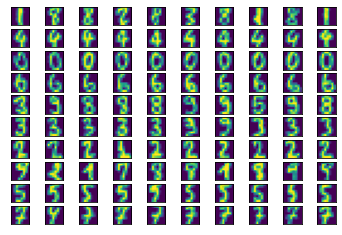

In [53]:
fig = plt.figure() #이미지 영역을 확보한다. 
idx = 1
for cluster in range(10):
    result = np.where(kmeans.labels_ == cluster) # kmeans.labels_ ==cluster인 경우 그 위치의 인덱스를 가져옵니다.
    for i in np.random.choice(result[0].tolist(), 10, replace = False): # result[0]에서 10개의 표본을 중복없이 추출.
        ax = fig.add_subplot(10, 10, idx) #sub로 다른 그래프 그리기
        plt.imshow(digits.images[i])
        ax.get_xaxis().set_visible(False) # x축 끄기
        ax.get_yaxis().set_visible(False) # y축 끄기
        
        idx += 1
plt.show()

### [Step5] 차원축소해 시각화하기

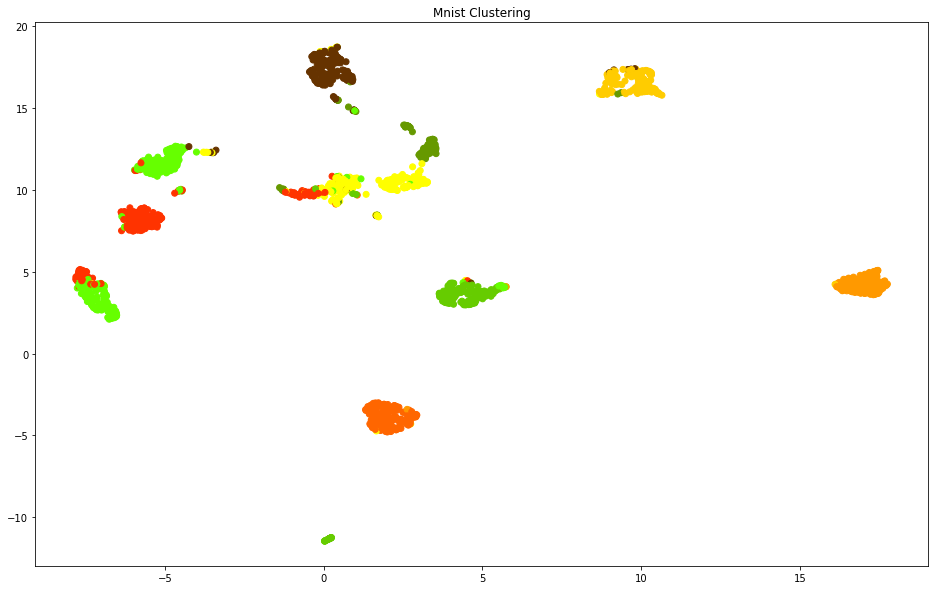

In [54]:
import umap

umap_emb = umap.UMAP().fit_transform(x)

fig = plt.figure(figsize=(16,10))
color_map = {
    0 : '#ffff00',
    1 : '#ffcc00',
    2 : '#ff9900',
    3 : '#ff6600',
    4 : '#ff3300',
    5 : '#66ff00',
    6 : '#66cc00',
    7 : '#669900',
    8 : '#66ff00',
    9 : '#663300'
}

plt.scatter(umap_emb[:,0], umap_emb[:,1], c=[color_map[x] for x in kmeans.labels_],alpha = 1)

plt.title('Mnist Clustering')
plt.show()